# Coronavirus Graphs

Hywel Owen  
11th March 2020

This Jupyter notebook is supplied free for use for educational purposes. There is no implied fitness for use for any purpose. In particular, you should not be using this notebook for predictive purposes. 

You may share and re-use this notebook according to the Creative Commons License Attribution ShareAlike (CC BY-SA) license, as described in https://creativecommons.org/use-remix/cc-licenses/  
<img src="https://licensebuttons.net/l/by-sa/4.0/88x31.png" align="left">

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 12})
plt.style.use('default')

## Manually-Collected Data from Wikipedia and NHC Sites

In [112]:
# Data sourced from:
# https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_February_2020
# and
# https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_March_2020
# and for China
# http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
# Some data updated 9th March 2020

days_uk = np.array([1,2,3,4,5,6,7,8,9,10,11]) # Days in March
cases_uk = np.array([35,39,51,87,116,163,206,273,317,382,460]) # UK Confirmed Cases in March 
cases_uk_growth = [100*(cases_uk[i]-cases_uk[i-1])/cases_uk[i-1] for i in range(1,len(cases_uk))]
cases_uk_growth_ratio = [(cases_uk[i]-cases_uk[i-1])/(cases_uk[i-1]-cases_uk[i-2]) for i in range(2,len(cases_uk))]


days_germany =np.array( [25, 26, 27, 28, 29,29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8,29+9,29+10,29+11])# Days since 1st February
cases_germany = np.array([18, 27, 45, 60, 66, 129,150,180,262,349,639,800,1018,1176,1565,1908]) # Germany Confirmed Cases 
cases_germany_growth = [100*(cases_germany[i]-cases_germany[i-1])/cases_germany[i-1] for i in range(1,len(cases_germany))]
cases_germany_growth_ratio = [(cases_germany[i]-cases_germany[i-1])/(cases_germany[i-1]-cases_germany[i-2]) for i in range(2,len(cases_germany))]


days_france =np.array( [1,2,3,4,5,6,7,8,9,10,11])# Days in March
cases_france = np.array([130,191,212,285,377,567,949,1126,1412,1784,2281]) # France Confirmed Cases in March 
cases_france_growth = [100*(cases_france[i]-cases_france[i-1])/cases_france[i-1] for i in range(1,len(cases_france))]
cases_france_growth_ratio = [(cases_france[i]-cases_france[i-1])/(cases_france[i-1]-cases_france[i-2]) for i in range(2,len(cases_france))]


days_italy =np.array( [21, 22, 23, 24, 25, 26, 27, 28, 29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8,29+9,29+10,29+11]) # Days since 1st February
cases_italy = np.array([20, 79, 152, 229, 323, 374, 655, 888, 1694,2064,2502,3089,3850,4628,5875,7375,9172,10149,12462]) # Italy Confirmed Cases
cases_italy_growth = [100*(cases_italy[i]-cases_italy[i-1])/cases_italy[i-1] for i in range(1,len(cases_italy))]
cases_italy_growth_ratio = [(cases_italy[i]-cases_italy[i-1])/(cases_italy[i-1]-cases_italy[i-2]) for i in range(2,len(cases_italy))]


#deaths_italy = np.array([1,2,3,7,12,17,21,29,34,52,80,107,148,197,233,366]) # Italy Confirmed Deaths

days_usa =np.array( [20,21,24,26,28,29,29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8,29+9]) # Days since 1st February
cases_usa = np.array([16,35,53,60,66,68,89,102,126,159,228,332,444,483,702])

days_skorea =np.array( [11,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 29+1,29+2,29+3,29+4,29+5,29+7,29+8,29+9]) # Days since 1st February
cases_skorea = np.array([28,29,30,31,51,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,5766,7041,7134,7478])

days_china =np.array( [-31+9,-31+17,-31+18,-31+19,-31+20,-31+21,-31+22,-31+23,-31+25,-31+26,-31+27,-31+28,-31+29,-31+30,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,18,20,22,24,26,28,29+1,29+3,29+4,29+5,29+6,29+7])# Days since 1st February
cases_china = np.array([41,45,62,201,218,291,571,628,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,33738,35982,37726,38800,44653,55748,57416,68500,70548,74185,75465,76936,77658,78497,79251,80026,80270,80409,80552,80651,80695]) # China Confirmed Cases 

days_iran =np.array( [19,20,21,22,23,24,25,26,27,28,29,29+1,29+2,29+3,29+5,29+6,29+7,29+8,29+9,29+10,29+11]) # Days since 1st February
cases_iran = np.array([2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,3513,4747,5823,6566,7161,8042,9000]) # Iran Confirmed Cases

days_india =np.array( [2,4,5,6,8,9,10])# Days in March
cases_india = np.array([6,29,30,31,39,44,62]) # India Confirmed Cases in March 

cases_italy_growth_ratio

[1.2372881355932204,
 1.0547945205479452,
 1.2207792207792207,
 0.5425531914893617,
 5.509803921568627,
 0.8291814946619217,
 3.459227467811159,
 0.45905707196029777,
 1.1837837837837837,
 1.3401826484018264,
 1.2964224872231687,
 1.0223390275952693,
 1.6028277634961439,
 1.202886928628709,
 1.198,
 0.5436839176405119,
 2.367451381780962]

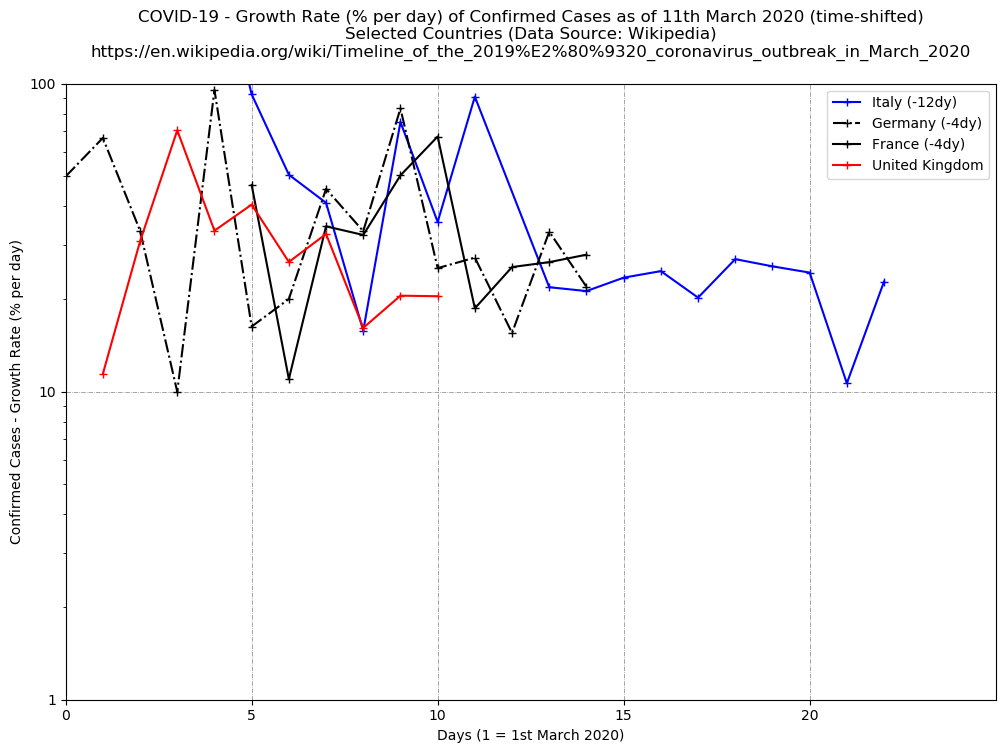

In [105]:
plt.figure(figsize=(12,8))
plt.plot(days_italy[:-1]-29+12, cases_italy_growth,'b+-')
plt.plot(days_germany[:-1]-29+4, cases_germany_growth,'k+-.')
plt.plot(days_france[:-1]+4, cases_france_growth,'k+-')
plt.plot(days_uk[:-1], cases_uk_growth,'r+-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,100)
plt.xlim(0,25)
plt.xticks(np.arange(0,25,5))
plt.yticks([1,10,100],['1','10','100'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases - Growth Rate (% per day)')
plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','United Kingdom'])
plt.title('COVID-19 - Growth Rate (% per day) of Confirmed Cases as of 11th March 2020 (time-shifted)\nSelected Countries (Data Source: Wikipedia)\nhttps://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_March_2020\n')
plt.savefig("coronaviruscasesgrowthratewikipedia.png")

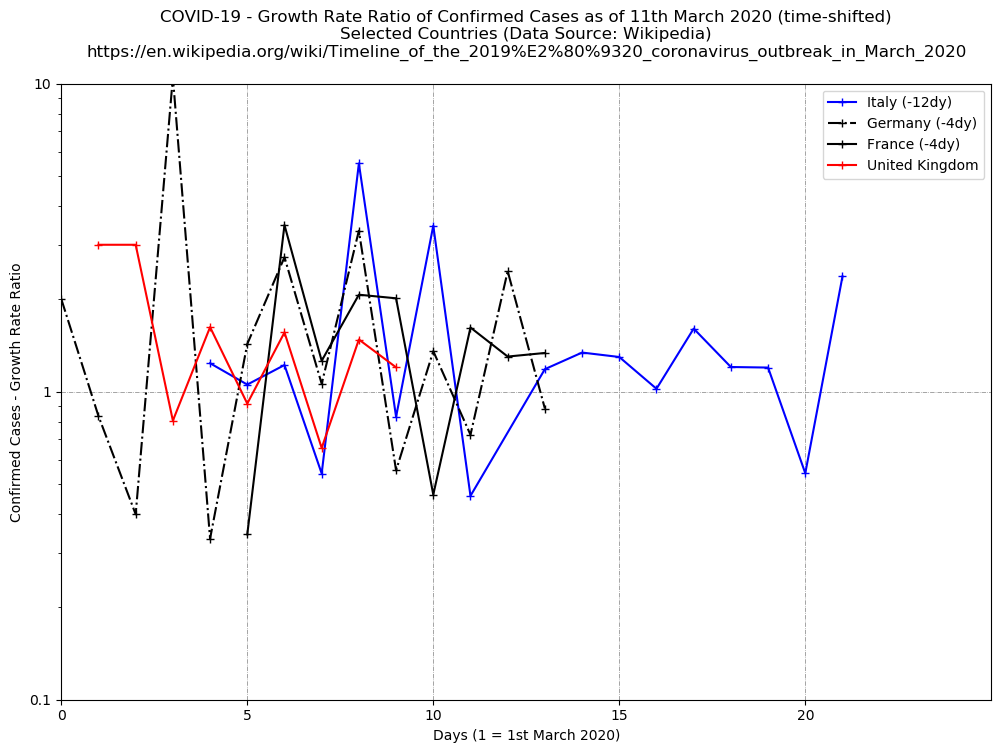

In [113]:
plt.figure(figsize=(12,8))
plt.plot(days_italy[:-2]-29+12, cases_italy_growth_ratio,'b+-')
plt.plot(days_germany[:-2]-29+4, cases_germany_growth_ratio,'k+-.')
plt.plot(days_france[:-2]+4, cases_france_growth_ratio,'k+-')
plt.plot(days_uk[:-2], cases_uk_growth_ratio,'r+-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(0.1,10)
plt.xlim(0,25)
plt.xticks(np.arange(0,25,5))
plt.yticks([0.1,1,10],['0.1','1','10'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases - Growth Rate Ratio')
plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','United Kingdom'])
plt.title('COVID-19 - Growth Rate Ratio of Confirmed Cases as of 11th March 2020 (time-shifted)\nSelected Countries (Data Source: Wikipedia)\nhttps://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_March_2020\n')
plt.savefig("coronaviruscasesgrowthrateratiowikipedia.png")

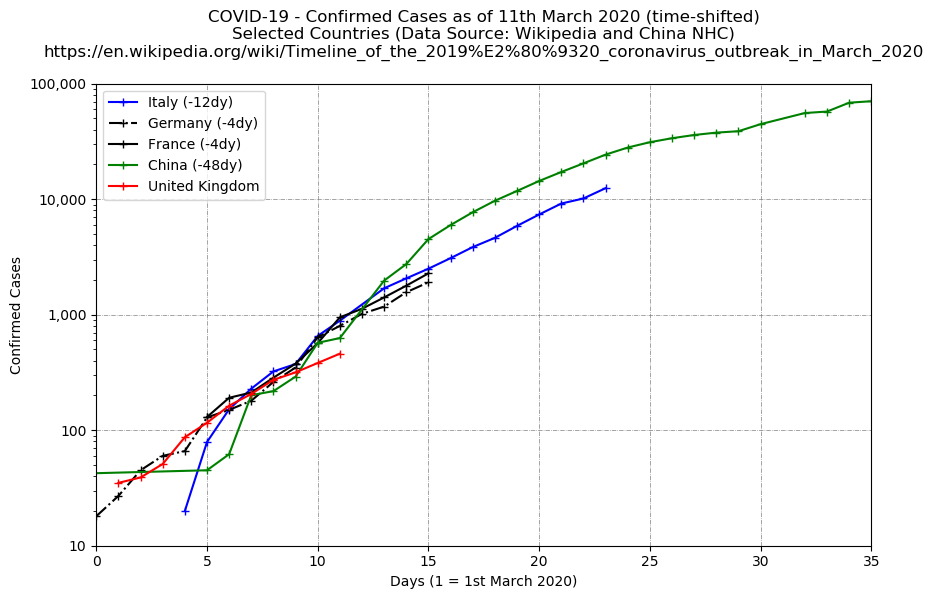

In [108]:
plt.figure(figsize=(10,6))
plt.plot(days_italy-29+12, cases_italy,'b+-')
plt.plot(days_germany-29+4, cases_germany,'k+-.')
plt.plot(days_france+4, cases_france,'k+-')
#plt.plot(days_usa-29+2, cases_usa,'ro-')
#plt.plot(days_skorea-29+15, cases_skorea,'k-')
plt.plot(days_china-29+48, cases_china,'g+-')
#plt.plot(days_iran-29+10, cases_iran,'b-')
#plt.plot(days_india-6, cases_india,'b-.')
plt.plot(days_uk, cases_uk,'r+-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(10,1000)
plt.xlim(0,35)
plt.xticks(np.arange(0,40,5))
plt.yticks([10,100,1000,1e4,1e5],['10','100','1,000','10,000','100,000'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases')
plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','China (-48dy)','United Kingdom'])
plt.title('COVID-19 - Confirmed Cases as of 11th March 2020 (time-shifted)\nSelected Countries (Data Source: Wikipedia and China NHC)\nhttps://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_March_2020\n')
plt.savefig("coronaviruscaseswikipedia.png")

Text(0.5, 1.0, 'COVID-19 - Model Cases (5 days to next infections, k = 4)')

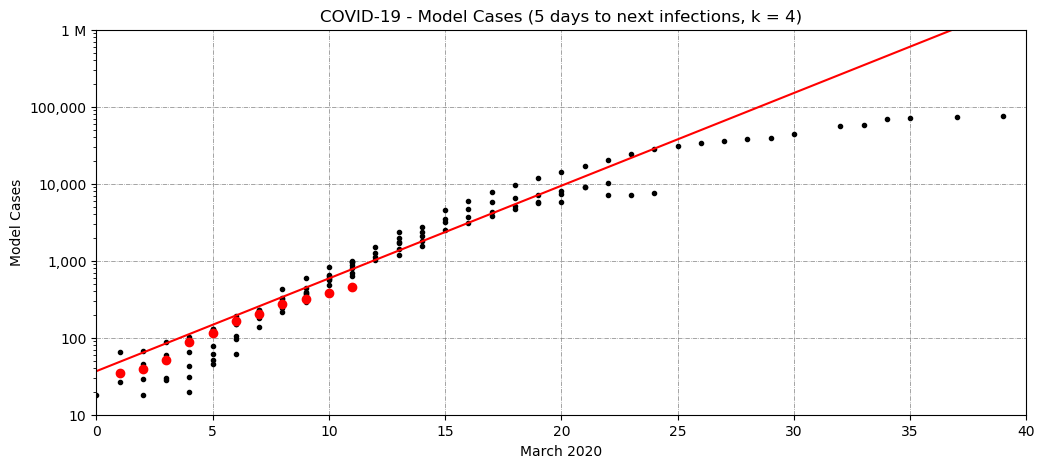

In [11]:
# This model should NOTE be used for any predictive purposes. This is NOT an epidemiology model.
# There is NO implied fitness of use for this code.
#
# WHO figures for incubation period
# https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200306-sitrep-46-covid-19.pdf?sfvrsn=96b04adf_2
#
inc_period = 5 # WHO estimate of incubation period before next infection
# inf_mult = 2.5 # WHO reproductive number - looks too low!
inf_mult = 4 # Assumed reproductive number - fits the data better
n_periods = 20 # How many incubation periods we will calculate for
model_days = np.zeros(n_periods)
model_infections = np.zeros(n_periods)
model_infections[0] = 1 # Patient zero!
for i in range(1,n_periods):
    model_days[i] = model_days[i-1] + inc_period
    # Each infected person infects inf_mult more people
    model_infections[i] = model_infections[i-1] * inf_mult
    
# print(model_days)
# print(model_infections)
plt.figure(figsize=(12,5))
plt.plot(days_italy-29+12, cases_italy,'k.')
plt.plot(days_germany-29+4, cases_germany,'k.')
plt.plot(days_france+4, cases_france,'k.')
plt.plot(days_usa-29+2, cases_usa,'k.')
plt.plot(days_skorea-29+15, cases_skorea,'k.')
plt.plot(days_china-29+48, cases_china,'k.')
plt.plot(days_iran-29+10, cases_iran,'k.')
plt.plot(days_uk, cases_uk,'ro')
plt.plot(model_days-13, model_infections,'r-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(10,1e6)
plt.xlim(0,20)
plt.xticks(np.linspace(0,40,9))
plt.yticks([10,100,1000,10000,1e5,1e6],['10','100','1,000','10,000','100,000','1 M'])
plt.xlabel('March 2020')
plt.ylabel('Model Cases')
#plt.legend(['Italy (- 12 days)','Germany (- 4 days)','France (- 4 days)','United Kingdom'])
plt.title('COVID-19 - Model Cases (' + str(inc_period) + ' days to next infections, k = ' + str(inf_mult) + ')')
#plt.savefig("coronavirusvirusmodel.png")

Text(0.5, 1.0, 'COVID-19 - Predicted UK Cases')

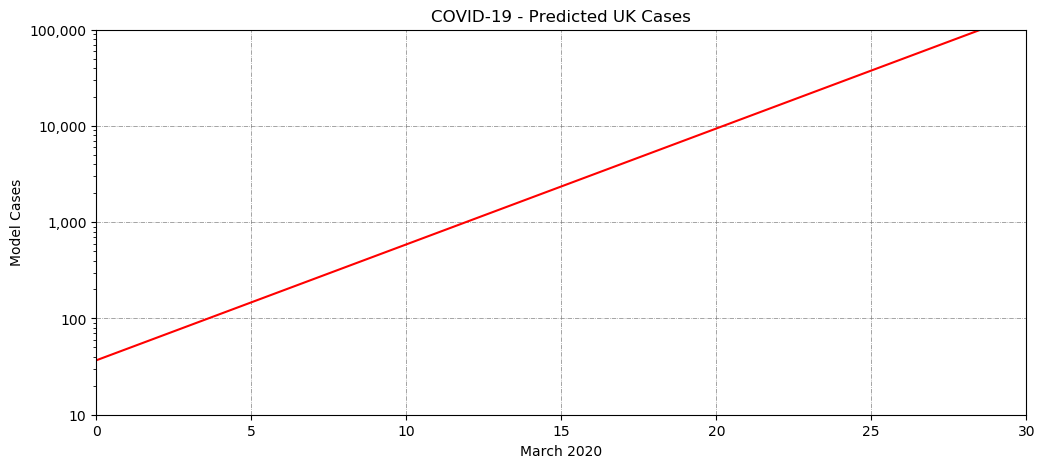

In [5]:
plt.figure(figsize=(12,5))
plt.plot(model_days-13, model_infections,'r-')
plt.yscale('log')
plt.ylim(10,1e4)
plt.xlim(0,20)
plt.xticks(np.linspace(0,30,7))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.xlabel('March 2020')
plt.ylabel('Model Cases')
plt.title('COVID-19 - Predicted UK Cases')
#plt.savefig("coronavirusvirusmodel.png")

## Automatically Collecting Data

Here, we collect data from the Johns Hopkins CSSE COVID-19 data repository, which is here:
https://github.com/CSSEGISandData/COVID-19  
  
The main data visualisation for this repository is here:
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html



In [115]:
# Read data direct from COVID-19 database
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

confirmed_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_confirmed_df = pd.read_csv(confirmed_data_url,error_bad_lines=False)

deaths_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
covid_deaths_df = pd.read_csv(deaths_data_url,error_bad_lines=False)    

In [116]:
covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Italy"].values

array([[nan, 'Italy', 43.0, 12.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155,
        229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858,
        4636, 5883, 7375, 9172, 10149, 12462]], dtype=object)

In [168]:
# 10th March - re-wrote code to use Pandas tools to select rows in data for each country
# 12th March have to re-write because Johns Hopkins keep changing the data format

# Extract data_frame values into values for plotting
# Find number of columns in the DataFrame
number_of_csv_columns = np.size(covid_confirmed_df.values[0])

df_cases_skorea = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="South Korea"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_france = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="France"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_germany = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Germany"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_india = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="India"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_italy = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Italy"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_uk = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="United Kingdom"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_spain = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Spain"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_iran = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Iran"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_switzerland = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Switzerland"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_southafrica = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="South Africa"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_czechrepublic = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Czech Republic"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
# Hong Kong command is a little different
df_cases_hongkong = [covid_confirmed_df[covid_confirmed_df["Province/State"]=="Hong Kong"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_singapore = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Singapore"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_sweden = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Sweden"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_belgium = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Belgium"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_japan = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Japan"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_norway = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Norway"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_canada = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Canada"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_ireland = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Ireland"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_mexico = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Mexico"].values[:,i].sum() for i in range(4,number_of_csv_columns)]

# Some countries are spread over several rows
df_cases_australia = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="Australia"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_china = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="China"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_cases_us = [covid_confirmed_df[covid_confirmed_df["Country/Region"]=="US"].values[:,i].sum() for i in range(4,number_of_csv_columns)]

df_cases_world = [covid_confirmed_df.values[0:265][:,i].sum() for i in range(4,number_of_csv_columns)]

# Extract data_frame values into values for plotting
# Find number of columns in the DataFrame
number_of_csv_columns = np.size(covid_deaths_df.values[0])

df_deaths_skorea = [covid_deaths_df[covid_deaths_df["Country/Region"]=="South Korea"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_france = [covid_deaths_df[covid_deaths_df["Country/Region"]=="France"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_germany = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Germany"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_india = [covid_deaths_df[covid_deaths_df["Country/Region"]=="India"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_italy = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Italy"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_uk = [covid_deaths_df[covid_deaths_df["Country/Region"]=="United Kingdom"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_spain = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Spain"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_iran = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Iran"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_switzerland = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Switzerland"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_southafrica = [covid_deaths_df[covid_deaths_df["Country/Region"]=="South Africa"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_czechrepublic = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Czech Republic"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
# Hong Kong command is a little different
df_deaths_hongkong = [covid_deaths_df[covid_deaths_df["Province/State"]=="Hong Kong"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_sweden = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Sweden"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_belgium = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Belgium"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_japan = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Japan"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_norway = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Norway"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_canada = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Canada"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_ireland = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Ireland"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_mexico = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Mexico"].values[:,i].sum() for i in range(4,number_of_csv_columns)]


# Some countries are spread over several rows
df_deaths_australia = [covid_deaths_df[covid_deaths_df["Country/Region"]=="Australia"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_china = [covid_deaths_df[covid_deaths_df["Country/Region"]=="China"].values[:,i].sum() for i in range(4,number_of_csv_columns)]
df_deaths_us = [covid_deaths_df[covid_deaths_df["Country/Region"]=="US"].values[:,i].sum() for i in range(4,number_of_csv_columns)]

df_deaths_world = [covid_deaths_df.values[0:265][:,i].sum() for i in range(4,number_of_csv_columns)]




In [118]:
from datetime import datetime
from datetime import date
covid_dataset_days = [datetime.strptime(i,'%m/%d/%y').timetuple().tm_yday \
                        for i in covid_confirmed_df.axes[1].to_numpy()[4::]]
#print(covid_confirmed_days)
# Convert days into days from 1st March
covid_death_days = np.asarray(covid_dataset_days)
covid_confirmed_days = -(31 + 29)+np.asarray(covid_dataset_days)
#type(covid_confirmed_days)


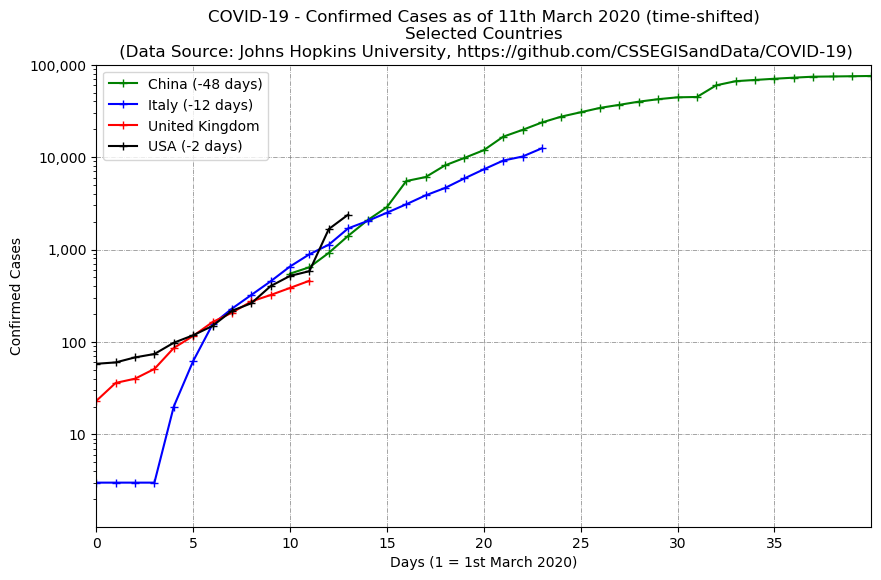

In [144]:
# Confirmed Cases
plt.figure(figsize=(10,6))
plt.plot(covid_confirmed_days+48,df_cases_china,'g+-')
plt.plot(covid_confirmed_days+12,df_cases_italy,'b+-')
plt.plot(covid_confirmed_days,df_cases_uk,'r+-')
plt.plot(covid_confirmed_days+2,df_cases_us,'k+-')
#plt.plot(covid_confirmed_days+15,df_cases_skorea,'k-')
#plt.plot(covid_confirmed_days+4,df_cases_france,'k-')
#plt.plot(covid_confirmed_days+4,df_cases_germany,'k-')
#plt.plot(covid_confirmed_days-6,df_cases_india,'k-')
#plt.plot(covid_confirmed_days+2,df_cases_spain,'k-')
#plt.plot(covid_confirmed_days+10,df_cases_iran,'k-')
#plt.plot(covid_confirmed_days,df_cases_switzerland,'k-')
#plt.plot(covid_confirmed_days-15,df_cases_southafrica,'k-')
#plt.plot(covid_confirmed_days-5,df_cases_czechrepublic,'k-')
#plt.plot(covid_confirmed_days-4,df_cases_australia,'k-')
#plt.plot(covid_confirmed_days-4,df_cases_hongkong,'k-')
#plt.plot(covid_confirmed_days-1,df_cases_sweden,'k-')
#plt.plot(covid_confirmed_days+14,df_cases_japan,'k-')
#plt.plot(covid_confirmed_days+0,df_cases_norway,'k-')
#plt.plot(covid_confirmed_days-1,df_cases_belgium,'k-')
#plt.plot(covid_confirmed_days+48,df_cases_world,'+-.')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,1e5)
plt.xlim(0,40)
plt.xticks(np.arange(0,40,5))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['China (-48 days)','Italy (-12 days)','United Kingdom', 'USA (-2 days)'])
plt.title('COVID-19 - Confirmed Cases as of 11th March 2020 (time-shifted)\nSelected Countries\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronaviruscases.png")

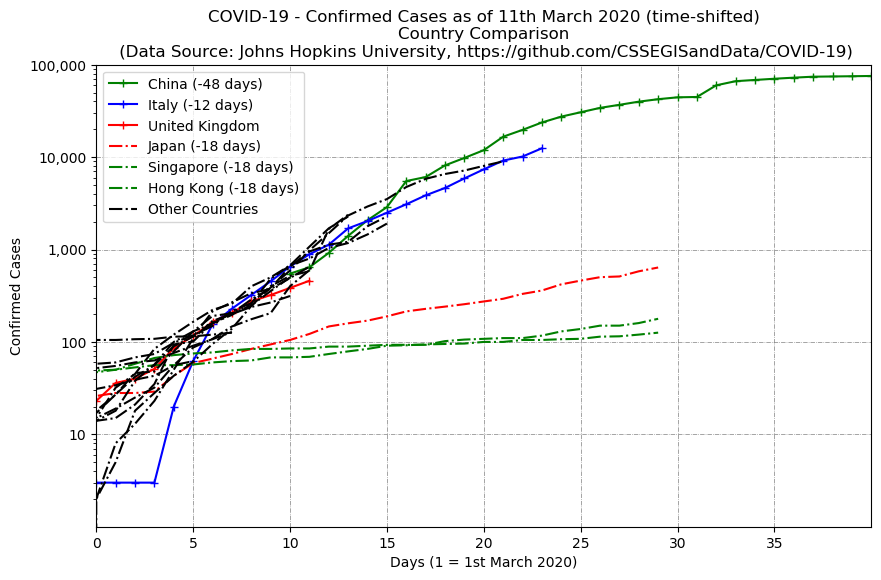

In [146]:
# Confirmed Cases
plt.figure(figsize=(10,6))
plt.plot(covid_confirmed_days+48,df_cases_china,'g+-')
plt.plot(covid_confirmed_days+12,df_cases_italy,'b+-')
plt.plot(covid_confirmed_days,df_cases_uk,'r+-')
plt.plot(covid_confirmed_days+18,df_cases_japan,'r-.')
plt.plot(covid_confirmed_days+18,df_cases_singapore,'g-.')
plt.plot(covid_confirmed_days+18,df_cases_hongkong,'g-.')
plt.plot(covid_confirmed_days+2,df_cases_us,'k-.')
plt.plot(covid_confirmed_days+15,df_cases_skorea,'k-.')
plt.plot(covid_confirmed_days+4,df_cases_france,'k-.')
plt.plot(covid_confirmed_days+4,df_cases_germany,'k-.')
plt.plot(covid_confirmed_days-6,df_cases_india,'k-.')


plt.plot(covid_confirmed_days+2,df_cases_spain,'k-.')
plt.plot(covid_confirmed_days+10,df_cases_iran,'k-.')
plt.plot(covid_confirmed_days,df_cases_switzerland,'k-.')
plt.plot(covid_confirmed_days-15,df_cases_southafrica,'k-.')
plt.plot(covid_confirmed_days-5,df_cases_czechrepublic,'k-.')
plt.plot(covid_confirmed_days-4,df_cases_australia,'k-.')
plt.plot(covid_confirmed_days-4,df_cases_hongkong,'k-.')
plt.plot(covid_confirmed_days-1,df_cases_sweden,'k-.')
plt.plot(covid_confirmed_days+0,df_cases_norway,'k-.')
plt.plot(covid_confirmed_days-1,df_cases_belgium,'k-.')
#plt.plot(covid_confirmed_days+48,df_cases_world,'+-.')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,1e5)
plt.xlim(0,40)
plt.xticks(np.arange(0,40,5))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['China (-48 days)','Italy (-12 days)','United Kingdom', 'Japan (-18 days)','Singapore (-18 days)','Hong Kong (-18 days)','Other Countries'])
plt.title('COVID-19 - Confirmed Cases as of 11th March 2020 (time-shifted)\nCountry Comparison\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronaviruscases_all.png")

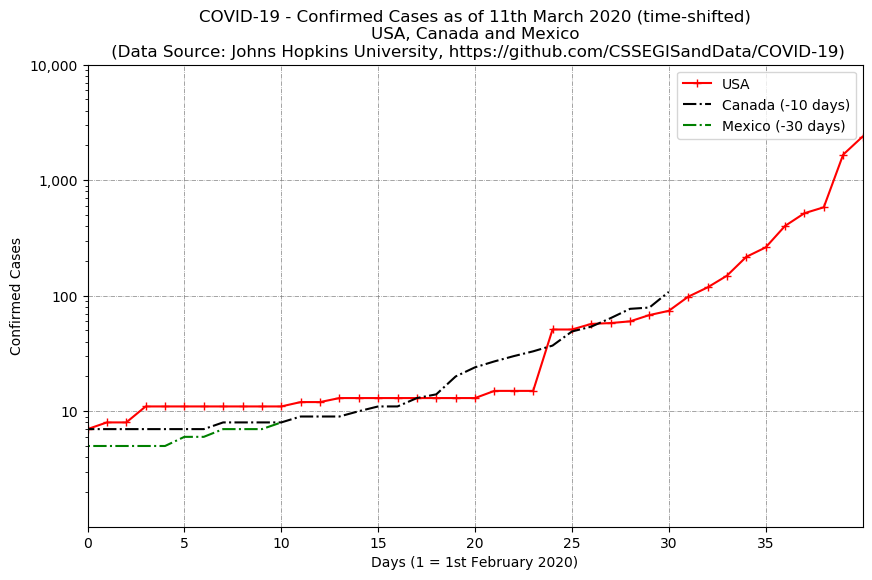

In [135]:
# Confirmed Cases
plt.figure(figsize=(10,6))
plt.plot(29+covid_confirmed_days,df_cases_us,'r+-')
plt.plot(29+covid_confirmed_days-10,df_cases_canada,'k-.')
plt.plot(29+covid_confirmed_days-30,df_cases_mexico,'g-.')
#plt.plot(covid_confirmed_days+48,df_cases_world,'+-.')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,1e4)
plt.xlim(0,40)
plt.xticks(np.arange(0,40,5))
plt.yticks([10,100,1000,10000],['10','100','1,000','10,000'])
plt.xlabel('Days (1 = 1st February 2020)')
plt.ylabel('Confirmed Cases')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['USA', 'Canada (-10 days)','Mexico (-30 days)'])
plt.title('COVID-19 - Confirmed Cases as of 11th March 2020 (time-shifted)\nUSA, Canada and Mexico\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronaviruscases_uscanadamexico.png")

In [150]:
df_cases_us[-1]

2384

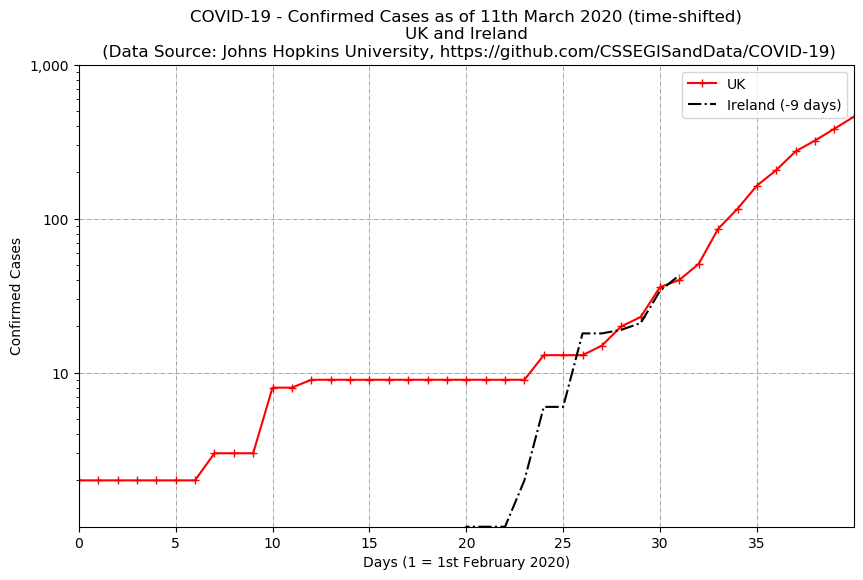

In [151]:
# Confirmed Cases
plt.figure(figsize=(10,6))
plt.plot(29+covid_confirmed_days,df_cases_uk,'r+-')
plt.plot(29+covid_confirmed_days-9,df_cases_ireland,'k-.')
#plt.plot(covid_confirmed_days+48,df_cases_world,'+-.')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,1e3)
plt.xlim(0,40)
plt.xticks(np.arange(0,40,5))
plt.yticks([10,100,1000],['10','100','1,000'])
plt.xlabel('Days (1 = 1st February 2020)')
plt.ylabel('Confirmed Cases')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['UK', 'Ireland (-9 days)'])
plt.title('COVID-19 - Confirmed Cases as of 11th March 2020 (time-shifted)\nUK and Ireland\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronaviruscases_ukireland.png")

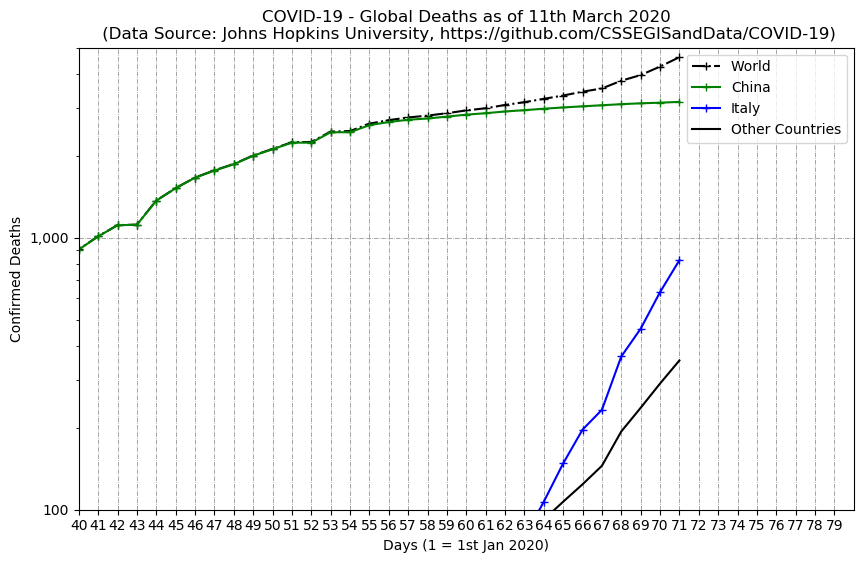

In [163]:
# Confirmed Deaths
plt.figure(figsize=(10,6))
plt.plot(covid_death_days,df_deaths_world,'k+-.')
plt.plot(covid_death_days,df_deaths_china,'g+-')
plt.plot(covid_death_days,df_deaths_italy,'b+-')
plt.plot(covid_death_days,df_deaths_us,'k-')
plt.plot(covid_death_days,df_deaths_skorea,'k-')
plt.plot(covid_death_days,df_deaths_france,'k-')
plt.plot(covid_death_days,df_deaths_germany,'k-')
plt.plot(covid_death_days,df_deaths_india,'k-')
plt.plot(covid_death_days,df_deaths_spain,'k-')
plt.plot(covid_death_days,df_deaths_iran,'k-')
plt.plot(covid_death_days,df_deaths_switzerland,'k-')
plt.plot(covid_death_days,df_deaths_southafrica,'k-')
plt.plot(covid_death_days,df_deaths_czechrepublic,'k-')
plt.plot(covid_death_days,df_deaths_uk,'k-')
plt.plot(covid_death_days,df_deaths_australia,'k-')
plt.plot(covid_death_days,df_deaths_hongkong,'k-')
plt.plot(covid_death_days,df_deaths_sweden,'k-')
plt.plot(covid_death_days,df_deaths_japan,'k-')
plt.plot(covid_death_days,df_deaths_norway,'k-')
plt.plot(covid_death_days,df_deaths_belgium,'k-')

plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
#plt.ylim(1,1e3)
#plt.xlim(1,31+29+31)
#plt.xticks(np.arange(0,31+29+31,10))
#plt.yticks([1,10,100,1000,10000],['1','10','100','1,000','10,000'])
plt.ylim(100,5000)
plt.xlim(40,80)
plt.xticks(np.arange(40,80,1))
plt.yticks([100,1000],['100','1,000'])
plt.xlabel('Days (1 = 1st Jan 2020)')
plt.ylabel('Confirmed Deaths')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['World','China','Italy','Other Countries'])
plt.title('COVID-19 - Global Deaths as of 11th March 2020\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronavirusdeaths.png")

## Read Data from UK Govt site

In [169]:
# Read Excel data direct from UK COVID-19 database
# More information here: https://www.gov.uk/government/publications/covid-19-track-coronavirus-cases

uk_df = pd.read_excel('https://www.arcgis.com/sharing/rest/content/items/e5fd11150d274bebaaf8fe2a7a2bda11/data', 'DailyConfirmedCases', index_col=None)

uk_daily_df = pd.read_excel('https://www.arcgis.com/sharing/rest/content/items/bc8ee90225644ef7a6f4dd1b13ea1d67/data', 'Sheet1', index_col=None)
uk_daily_df.head()

,DateVal,TotalUKCases,NewUKCases,TotalUKDeaths,EnglandCases,ScotlandCases,WalesCases,NICases
0,2020-03-11,456,83,6,387,36,15,18


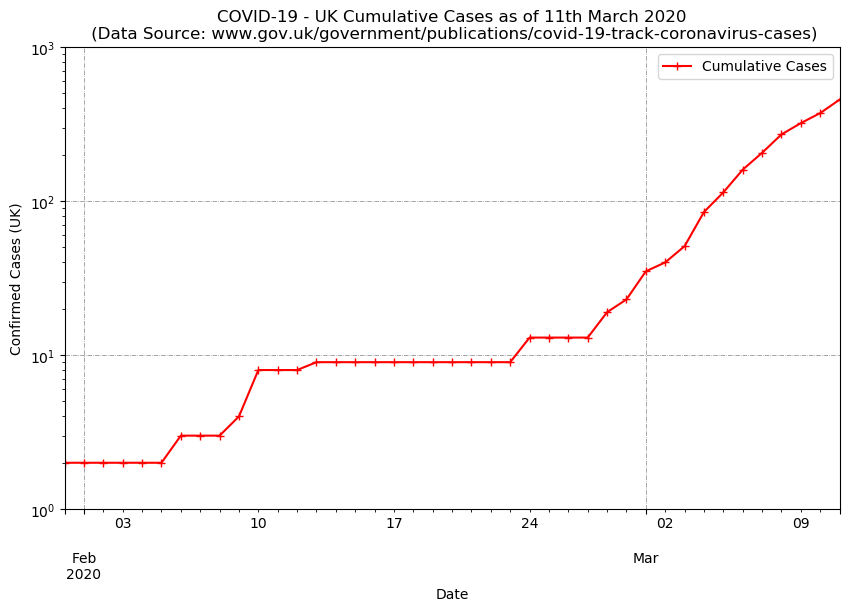

In [156]:
plt.figure(figsize=(10,6))
ax = plt.gca()
uk_df.plot(kind='line', x='DateVal', y='CumCases',color='red',linestyle='solid',marker='+', ax=ax)
#ax.set_xlabel('Date')
#ax.set_title('COVID-19 - UK Cumulative Cases as of 10th March 2020\n (Data Source: UK Gov')
#ax.savefig("coronavirusuk.png")
plt.yscale('log')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.ylim(1,1000)
#plt.yticks([1,10,100,1000,10000],['1','10','100','1,000','10,000'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (UK)')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['Cumulative Cases'])
plt.title('COVID-19 - UK Cumulative Cases as of 11th March 2020\n (Data Source: www.gov.uk/government/publications/covid-19-track-coronavirus-cases)')
plt.savefig("coronavirusukgov.png")

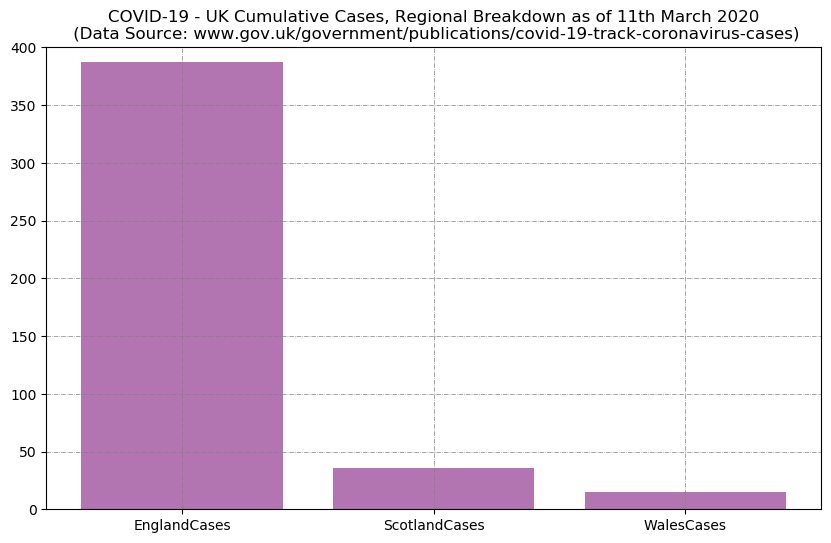

In [157]:
breakdowntitles = uk_daily_df.axes[1].to_numpy()[4:7]
breakdownvals = uk_daily_df.values[0,4:7]
plt.figure(figsize=(10,6))
plt.bar(breakdowntitles,breakdownvals,color = (0.5,0.1,0.5,0.6))
plt.ylim(0,400)
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.title('COVID-19 - UK Cumulative Cases, Regional Breakdown as of 11th March 2020\n (Data Source: www.gov.uk/government/publications/covid-19-track-coronavirus-cases)')
plt.savefig("coronavirusukgovregional.png")


## Analysis of testing rates
(to be done)  
https://www.worldometers.info/coronavirus/covid-19-testing/